In [1]:
from __future__ import division
from utils import *
from functions import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)


In [2]:
from bokeh.io import output_notebook
output_notebook()

BokehJS successfully loaded.

In [3]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH()

# Figure style
fontsize =14

matplotlib.rc('xtick', labelsize=fontsize)
matplotlib.rc('ytick', labelsize=fontsize)
matplotlib.rc('axes', labelsize = fontsize)
matplotlib.rc('axes', titlesize = fontsize)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('axes', facecolor = "white")

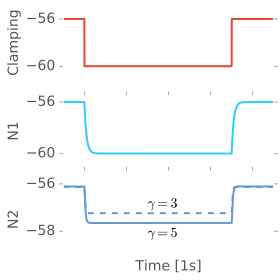

In [4]:
T = 1100
dt = 0.1
t = np.arange(0,T,dt)
N=3
ylim=[-61,-55]

c= 0
g = [0,5,3]
v = np.ones(shape=(N, len(t)))*-56
u = np.zeros(shape=(N, len(t)))
_input=np.zeros(shape=(1, len(t)))
for i in range(len(t)-1):
    
    b = (i*dt> 200 and i*dt < 900) 
    
    v[0,i+1] = -60*b -56*(1-b)
    _input[0,i+1] = v[0,i+1]
    v[0,i+1] = v[0,i] + dt/10*(v[0,i+1] -v[0,i])
    for k in [1,2]:
        v[k,i+1] = v[k,i] + dt/15 * ( (v[k,i]+60)*(v[k,i]+50) - 20*u[k,i] -N*g[k]*(v[k,i]-v[0,i]))
        u[k,i+1] = u[k,i] + dt * 0.1 * ( (v[k,i] +55) - u[k,i])

    u[:,i+1] = u[:,i+1] + 50* (v[:,i+1]>25)
    v[:,i+1] = -40 * (v[:,i+1]>25) + v[:,i+1]*(v[:,i+1]<=25)


fig = plt.figure(figsize=(4,4))

# plot clamping voltage
ax = fig.add_subplot(311)
ax.plot(t,_input[0,:])
ax.set_xlim([100,1100])
ax.set_xticks([])
ax.set_ylim([-61,-55])
ax.set_yticks([-60,-56])
ax.set_ylabel('Clamping')

# plot N1
ax = fig.add_subplot(312)         
ax.set_xticklabels([])
ax.plot(t, v[0,:],color='#33ccff', label='v. clamped neuron')
ax.set_xlim([100,1100])
ax.set_ylim([-61,-55.5])
ax.set_yticks([-60,-56])
ax.set_ylabel('N1')

# plot N2 for 2 different values of gamma
ax = fig.add_subplot(313)
ax.set_xticklabels([])
ax.plot(t, v[1,:],color='#6699cc', label=r'$\gamma$ coupled neuron')
ax.plot(t, v[2,:],'--',color='#6699cc', label=r'$\gamma$ coupled neuron')
ax.set_axis_bgcolor((1, 1,1))

ax.set_ylabel('N2')
ax.set_xlabel('Time [1s]')
ax.set_ylim([-59,-56])
ax.set_yticks([-58,-56])
ax.set_xticks([])
ax.set_xlim([100,1100])
ax.text(500,-58.25,r'$\gamma=5$', fontsize = fontsize)
ax.text(500,-57.0,r'$\gamma=3$', fontsize = fontsize)
# plt.suptitle('Effect of gap-junction coupling', fontsize=fontsize)
plt.tight_layout()
plt.savefig(DIRECTORY+'coupling.pdf')


In [46]:
v = np.zeros(shape=(2,3))
v[:,1]=2+v[:,0]
v

array([[ 0.,  2.,  0.],
       [ 0.,  2.,  0.]])

In [47]:
v[:,1]=[3,-1]
v

array([[ 0.,  3.,  0.],
       [ 0., -1.,  0.]])

In [48]:
v[:,1]>0

array([ True, False], dtype=bool)